---
title: "Titanic Wrangling"
author: "Toby Guenthner"
format:
  html:
    code-fold: true
jupyter: python3
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
import pandas as pd
import numpy as np

# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
df_titanic["class"].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

In [4]:
# Code here
df_titanic_passengers = df_titanic[(df_titanic["class"] == '3rd') | (df_titanic["class"] == '2nd') | (df_titanic["class"] == '1st')]
df_titanic_passengers

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [5]:
joint = pd.crosstab(df_titanic_passengers["class"],df_titanic_passengers["embarked"])
joint

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

## My own way of trying to find the joint distribution

In [6]:
embarked_conditional = pd.crosstab(df_titanic_passengers["embarked"],df_titanic_passengers["class"])
embarked_conditional["total"] = df_titanic_passengers["embarked"].value_counts()
for i in range(len(embarked_conditional[embarked_conditional.columns[0]])): #Looks weird, but I'm simply grabbing the first column index label in the list of labels and getting the length of that column; assumes all columns are equal length
  row = embarked_conditional.iloc[i] #Get the row
  newrow = row / embarked_conditional.iloc[i][-1] #Divide the row by the total count to get conditional probabilities along each row
  embarked_conditional.iloc[i] = newrow #Commit the changes to the original dataframe
print(embarked_conditional)

class_conditional = pd.crosstab(df_titanic_passengers["class"],df_titanic_passengers["embarked"])
class_conditional["total"] = df_titanic_passengers["class"].value_counts()
for i in range(len(class_conditional[class_conditional.columns[0]])): #Looks weird, but I'm simply grabbing the first column index label in the list of labels and getting the length of that column; assumes all columns are equal length
  row = class_conditional.iloc[i] #Get the row
  newrow = row / class_conditional.iloc[i][-1] #Divide the row by the total count to get conditional probabilities along each row
  class_conditional.iloc[i] = newrow #Commit the changes to the original dataframe
print(class_conditional)

class          1st       2nd       3rd  total
embarked                                     
B         0.333333  0.666667  0.000000      1
C         0.527675  0.095941  0.376384      1
Q         0.024390  0.056911  0.918699      1
S         0.191466  0.268053  0.540481      1
embarked         B         C         Q         S  total
class                                                  
1st       0.009259  0.441358  0.009259  0.540123      1
2nd       0.021127  0.091549  0.024648  0.862676      1
3rd       0.000000  0.143865  0.159379  0.696756      1


## Shortcut method

In [31]:
embarked_conditional2 = pd.crosstab(df_titanic_passengers["embarked"],df_titanic_passengers["class"], normalize = 'index')
print(embarked_conditional2)

class_conditional2 = pd.crosstab(df_titanic_passengers["embarked"],df_titanic_passengers["class"], normalize = 'columns')
class_conditional2

class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481


class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


Southampton is S for embarked, so we look at given the class is 3rd, how many were from Southampton. This is the second table at 3rd and S. So, about 69.7% of the 3rd class passengers embarked from Southampton.

The proportion of 3rd class given they were from Southampton is the same but in our first table. So, about 54% of Southampton people were 3rd class passengers.

In [32]:
#This will change the row indexing, but turn the current indexing by embarked into it's own column to be able to melt with
embarked_conditional2.reset_index(inplace=True)
#Found from https://datatofish.com/index-to-column-pandas-dataframe/
long_df = embarked_conditional2.melt(id_vars=["embarked"], var_name="class", value_name="probability")
long_df

,embarked,class,probability
0,B,1st,0.333333
1,C,1st,0.527675
2,Q,1st,0.024390
3,S,1st,0.191466
4,B,2nd,0.666667
5,C,2nd,0.095941
6,Q,2nd,0.056911
7,S,2nd,0.268053
8,B,3rd,0.000000
9,C,3rd,0.376384


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

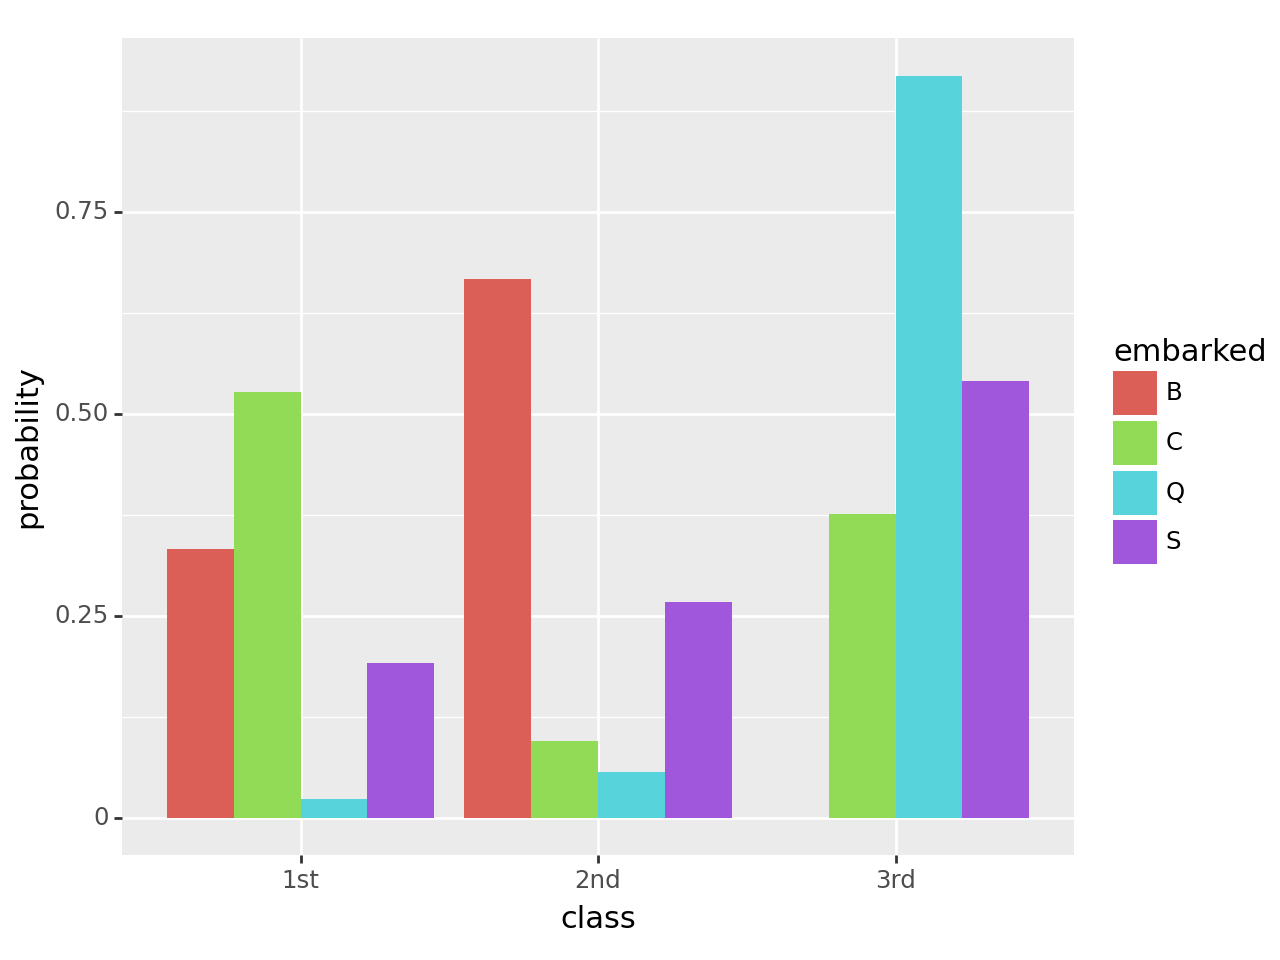

<Figure Size: (640 x 480)>

In [37]:
from plotnine.scales import scale_fill_manual
from plotnine import ggplot,aes,geom_col,scale_x_continuous,scale_y_continuous, scale_size, annotate
(ggplot(long_df, aes(x = "class", y= "probability",fill="embarked"))
+geom_col(stat='identity', position='dodge') #Got this from https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html
 )

For specifically the distribution of class type conditionally on the embark location, this chart does a very good job at immediately providing the information, at least roughly. It is still less precise than the table, as the actual values have to be estimated from the y-axis tick labels which can be hard for some of them. We could do a similar plot with the other data on embarked given the class and then be able to answer the same questions as before but with the plots rather than the tables.